<a href="https://colab.research.google.com/github/psst54/startTensor/blob/master/ch6_fashion_mnist_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

conv1 = tf.keras.layers.Conv2D(kernel_size = (3, 3), strides = (2, 2), padding = 'valid', filters = 16)

pool1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2))

pool1 = tf.keras.layers.Dropout(rate = 0.3)

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


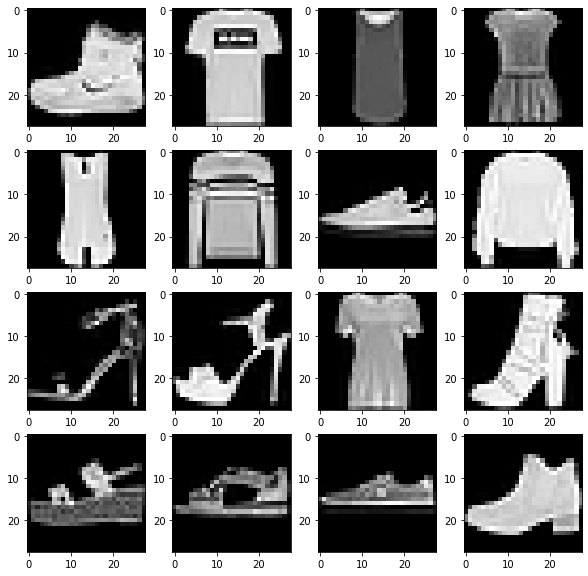

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for c in range(16):
    plt.subplot(4, 4, c + 1)
    plt.imshow(train_X[c].reshape(28, 28), cmap = 'gray')

plt.show()

print(train_Y[:16])

In [7]:
# using only convolution layer

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 16),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4711 - accuracy: 0.8343 - val_loss: 0.3877 - val_accuracy: 0.8593
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3381 - accuracy: 0.8764 - val_loss: 0.3657 - val_accuracy: 0.8676
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2853 - accuracy: 0.8956 - val_loss: 0.4137 - val_accuracy: 0.8603
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2430 - accuracy: 0.9090 - val_loss: 0.3927 - val_accuracy: 0.8697
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2136 - accuracy: 0.9202 - val_loss: 0.4050 - val_accuracy: 0.8707
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1821 - accuracy: 0.9319 - val_loss: 0.4916 - val_accuracy: 0.8695
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1696 - accuracy: 0.9371 - val_loss: 0.5290 - val_accuracy:

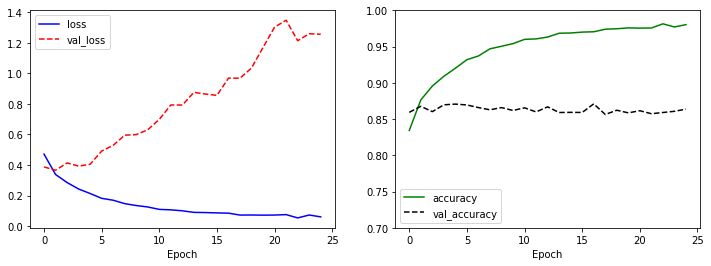

[1.3462408781051636, 0.8616999983787537]

In [8]:
# using only convolution layer : result

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

In [10]:
# using convolution layer, pooling layer, dropout layer

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.3),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5250 - accuracy: 0.8106 - val_loss: 0.3733 - val_accuracy: 0.8614
Epoch 2/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3587 - accuracy: 0.8705 - val_loss: 0.3499 - val_accuracy: 0.8733
Epoch 3/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8855 - val_loss: 0.3024 - val_accuracy: 0.8905
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.8963 - val_loss: 0.3219 - val_accuracy: 0.8817
Epoch 5/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9026 - val_loss: 0.3166 - val_accuracy: 0.8850
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9077 - val_loss: 0.3010 - val_accuracy: 0.8931
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.9132 - val_loss: 0.3198 - val_accuracy:

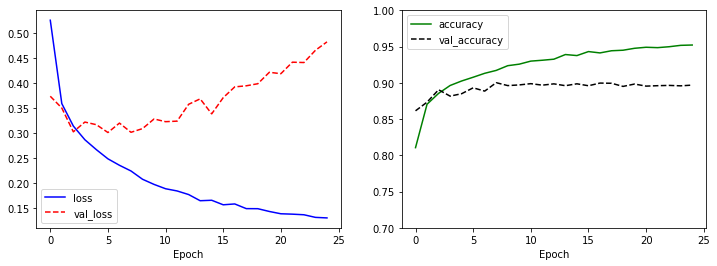

[0.5074339509010315, 0.8909000158309937]

In [11]:
# using convolution layer, pooling layer, dropout layer : result

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

In [12]:
# using VGGNet

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 256)        

Epoch 1/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5603 - accuracy: 0.7989 - val_loss: 0.3358 - val_accuracy: 0.8761
Epoch 2/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3453 - accuracy: 0.8789 - val_loss: 0.2612 - val_accuracy: 0.9050
Epoch 3/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2969 - accuracy: 0.8935 - val_loss: 0.2392 - val_accuracy: 0.9129
Epoch 4/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2680 - accuracy: 0.9038 - val_loss: 0.2355 - val_accuracy: 0.9097
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2469 - accuracy: 0.9111 - val_loss: 0.2273 - val_accuracy: 0.9168
Epoch 6/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2324 - accuracy: 0.9158 - val_loss: 0.2200 - val_accuracy: 0.9218
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2196 - accuracy: 0.9200 - val_loss: 0.2082 - val_accuracy:

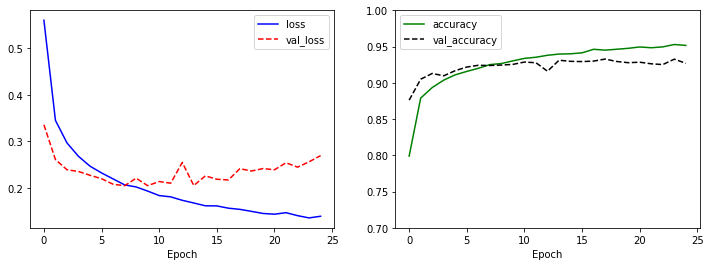

[0.32246431708335876, 0.9218000173568726]

In [13]:
# using VGGNet : result

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)

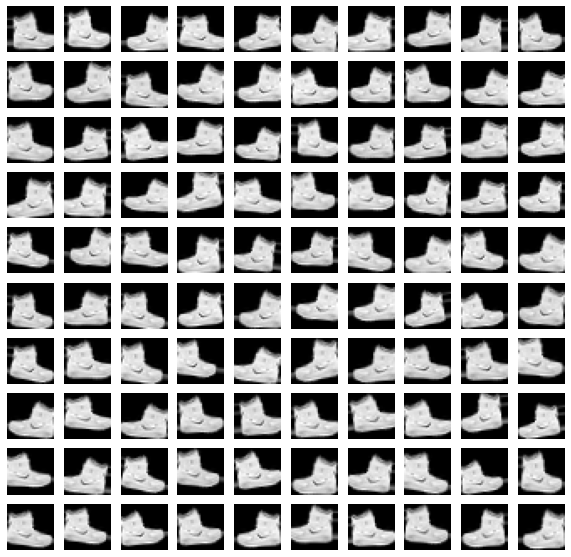

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28 * 28),100).reshape(-1, 28, 28, 1), np.zeros(augment_size), batch_size = augment_size, shuffle = False).next()[0]

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for c in range(100):
    plt.subplot(10, 10, c + 1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28, 28), cmap = 'gray')
plt.show()

In [24]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size = augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle = False).next()[0]

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.5229 - accuracy: 0.8097 - val_loss: 0.5172 - val_accuracy: 0.8016
Epoch 2/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.3387 - accuracy: 0.8777 - val_loss: 0.4702 - val_accuracy: 0.8200
Epoch 3/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.2964 - accuracy: 0.8934 - val_loss: 0.4210 - val_accuracy: 0.8387
Epoch 4/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.2671 - accuracy: 0.9027 - val_loss: 0.4304 - val_accuracy: 0.8351
Epoch 5/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.2511 - accuracy: 0.9091 - val_loss: 0.4243 - val_accuracy: 0.8471
Epoch 6/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.2410 - accuracy: 0.9130 - val_loss: 0.3806 - val_accuracy: 0.8573
Epoch 7/25
2110/2110 [==============================] - 13s 6ms/step - loss: 0.2287 - accuracy: 0.9174 - val_loss: 0.3934 - val_ac

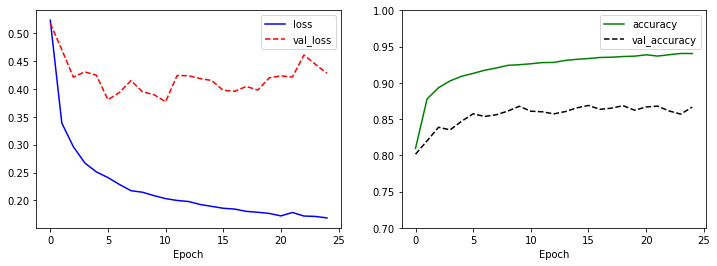

[0.23950272798538208, 0.9276000261306763]

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose = 0)